Problem Statement: Predicting Income Classification:

This model that can look at certain information about a person, like their job, education, and age, and then decide if they earn a greater than 50K or less than 50K. This can be useful for understanding people's financial situations.

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [ ]:
ie = pd.read_csv("/content/drive/MyDrive/income_evaluation.csv")


In [ ]:
ie.shape


(32561, 15)

Data Encryption Standard

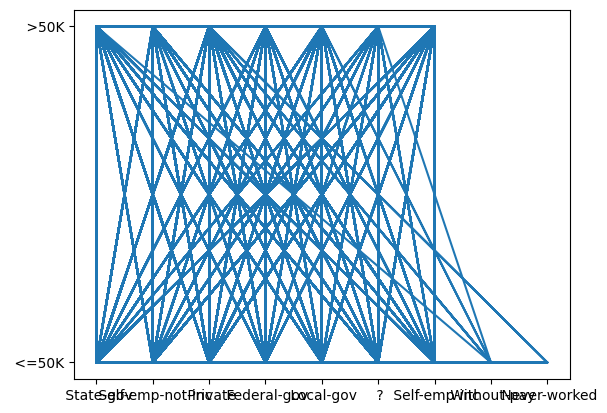

In [ ]:
plt.plot(ie.workclass,ie.income)
plt.show()

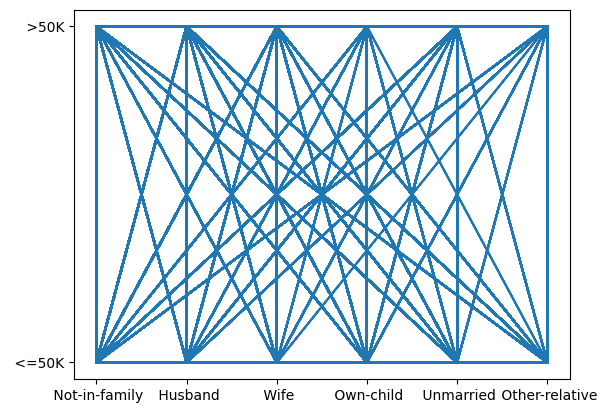

In [ ]:
plt.plot(ie.relationship,ie.income)
plt.show()

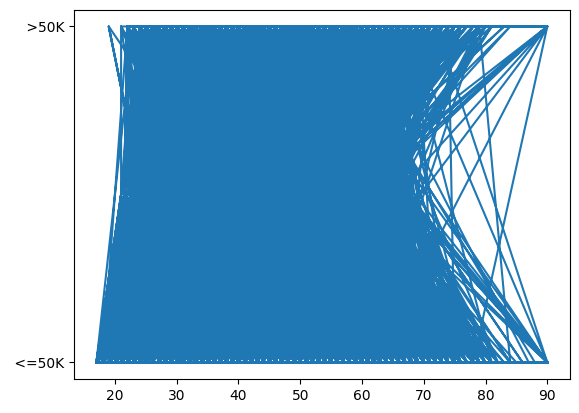

In [ ]:
plt.plot(ie.age,ie.income)
plt.show()

higher-order interpolation

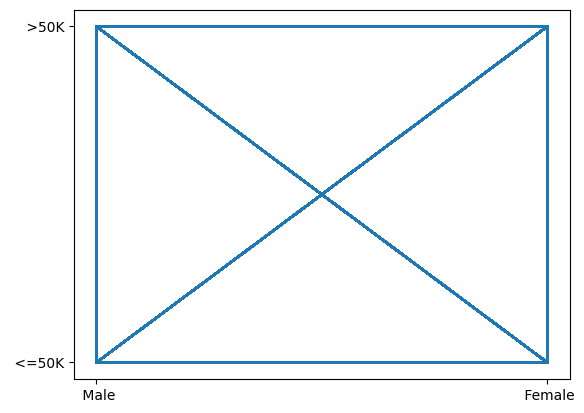

In [ ]:
plt.plot(ie.sex,ie.income)
plt.show()

showing all the perceentage of the occupation in the data set

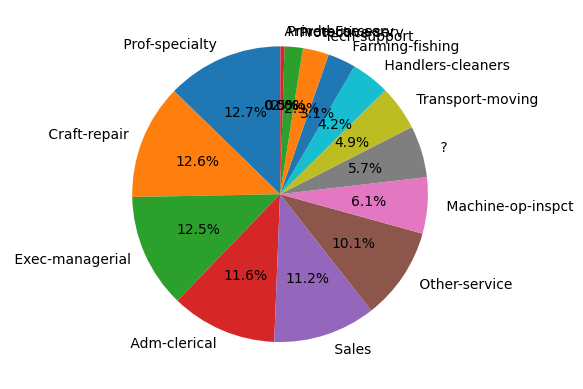

In [ ]:
occupation_counts = ie['occupation'].value_counts()
occupations = occupation_counts.index
plt.pie(occupation_counts, labels=occupations, autopct='%1.1f%%', startangle=90)
plt.show()

In [ ]:
ie.isnull().sum()


age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [ ]:
ie.shape

(32561, 15)

Data Preprocessing

In [ ]:
ie.workclass.value_counts()


 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [ ]:
ie.workclass.replace({' Private':0,' Self-emp-not-inc': 1,' Local-gov': 2,' ?': 3,' State-gov': 4,' Self-emp-inc': 5,' Federal-gov': 6,' Without-pay':7,' Never-worked':8},inplace=True)


In [ ]:
ie.workclass.value_counts()


0    22696
1     2541
2     2093
3     1836
4     1298
5     1116
6      960
7       14
8        7
Name: workclass, dtype: int64

In [ ]:
ie


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,4,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,1,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,0,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,0,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,0,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,0,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,0,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,0,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,0,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
ie.education.value_counts()


 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [ ]:
ie.education.replace({' HS-grad':0,' Some-college': 1,' Bachelors': 2,' Masters': 3,' Assoc-voc': 4,' 11th': 5,' Assoc-acdm': 6,' 10th':7,' 7th-8th':8,' Prof-school': 9,' 9th':10,' 12th':11,' Doctorate': 12,' 5th-6th':13,' 1st-4th':14,' Preschool':15},inplace=True)


In [ ]:
ie

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,4,77516,2,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,1,83311,2,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,0,215646,0,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,0,234721,5,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,0,338409,2,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,0,257302,6,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,0,154374,0,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,0,151910,0,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,0,201490,0,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
ie.education.value_counts()


0     10501
1      7291
2      5355
3      1723
4      1382
5      1175
6      1067
7       933
8       646
9       576
10      514
11      433
12      413
13      333
14      168
15       51
Name: education, dtype: int64

In [ ]:
ie.rename(columns={'marital-status':'marital_status'},inplace=True)

In [ ]:
ie.marital_status.value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64

In [ ]:
ie.marital_status.replace({' Married-civ-spouse':0,' Never-married': 1,' Divorced': 2,' Separated': 3,' Widowed': 4,' Married-spouse-absent': 5,' Married-AF-spouse': 6},inplace=True)


In [ ]:
ie

,age,workclass,fnlwgt,education,education-num,marital_status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,4,77516,2,13,1,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,1,83311,2,13,0,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,0,215646,0,9,2,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,0,234721,5,7,0,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,0,338409,2,13,0,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,0,257302,6,12,0,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,0,154374,0,9,0,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,0,151910,0,9,4,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,0,201490,0,9,1,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
ie.occupation.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [ ]:
ie.occupation.replace({' Prof-specialty':0,' Craft-repair': 1,' Exec-managerial': 2,' Adm-clerical': 3,' Adm-clerical': 4,' Sales': 5,' Other-service': 6,' Machine-op-inspct':7,' ?':0,' Transport-moving': 9,' Handlers-cleaners':10,' Farming-fishing':11,' Handlers-cleaners': 12,' Farming-fishing':13,' Tech-support':14,' Protective-serv':15, ' Priv-house-serv':14,' Armed-Forces':15},inplace=True)


In [ ]:
ie

,age,workclass,fnlwgt,education,education-num,marital_status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,4,77516,2,13,1,4,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,1,83311,2,13,0,2,Husband,White,Male,0,0,13,United-States,<=50K
2,38,0,215646,0,9,2,12,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,0,234721,5,7,0,12,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,0,338409,2,13,0,0,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,0,257302,6,12,0,14,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,0,154374,0,9,0,7,Husband,White,Male,0,0,40,United-States,>50K
32558,58,0,151910,0,9,4,4,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,0,201490,0,9,1,4,Own-child,White,Male,0,0,20,United-States,<=50K


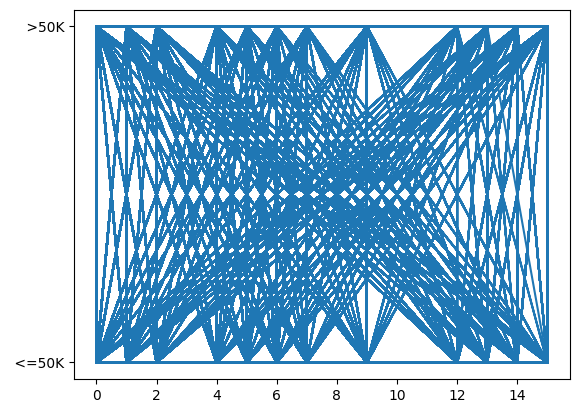

In [ ]:
plt.plot(ie.occupation,ie.income)
plt.show()

In [ ]:
ie.relationship.value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

In [ ]:
ie.relationship.replace({' Husband':0,' Not-in-family': 1,' Own-child': 2,' Unmarried': 3,' Wife': 4,' Other-relative': 5},inplace=True)


In [ ]:
ie


,age,workclass,fnlwgt,education,education-num,marital_status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,4,77516,2,13,1,4,1,White,Male,2174,0,40,United-States,<=50K
1,50,1,83311,2,13,0,2,0,White,Male,0,0,13,United-States,<=50K
2,38,0,215646,0,9,2,12,1,White,Male,0,0,40,United-States,<=50K
3,53,0,234721,5,7,0,12,0,Black,Male,0,0,40,United-States,<=50K
4,28,0,338409,2,13,0,0,4,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,0,257302,6,12,0,14,4,White,Female,0,0,38,United-States,<=50K
32557,40,0,154374,0,9,0,7,0,White,Male,0,0,40,United-States,>50K
32558,58,0,151910,0,9,4,4,3,White,Female,0,0,40,United-States,<=50K
32559,22,0,201490,0,9,1,4,2,White,Male,0,0,20,United-States,<=50K


In [ ]:
ie.rename(columns={'native-country':'native_country'},inplace=True)

In [ ]:
ie.native_country.value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [ ]:
ie.income.value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

In [ ]:
ie.income.replace({' <=50K':0,' >50K':1},inplace=True)

In [ ]:
ie

,age,workclass,fnlwgt,education,education-num,marital_status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native_country,income
0,39,4,77516,2,13,1,4,1,White,Male,2174,0,40,United-States,0
1,50,1,83311,2,13,0,2,0,White,Male,0,0,13,United-States,0
2,38,0,215646,0,9,2,12,1,White,Male,0,0,40,United-States,0
3,53,0,234721,5,7,0,12,0,Black,Male,0,0,40,United-States,0
4,28,0,338409,2,13,0,0,4,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,0,257302,6,12,0,14,4,White,Female,0,0,38,United-States,0
32557,40,0,154374,0,9,0,7,0,White,Male,0,0,40,United-States,1
32558,58,0,151910,0,9,4,4,3,White,Female,0,0,40,United-States,0
32559,22,0,201490,0,9,1,4,2,White,Male,0,0,20,United-States,0


In [ ]:
ie.drop(columns='race', inplace=True)


In [ ]:
ie.drop(columns='native_country', inplace=True)


In [ ]:
ie.sex.replace({' Male':0,' Female':1},inplace=True)

In [ ]:
ie

,age,workclass,fnlwgt,education,education-num,marital_status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,income
0,39,4,77516,2,13,1,4,1,0,2174,0,40,0
1,50,1,83311,2,13,0,2,0,0,0,0,13,0
2,38,0,215646,0,9,2,12,1,0,0,0,40,0
3,53,0,234721,5,7,0,12,0,0,0,0,40,0
4,28,0,338409,2,13,0,0,4,1,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,0,257302,6,12,0,14,4,1,0,0,38,0
32557,40,0,154374,0,9,0,7,0,0,0,0,40,1
32558,58,0,151910,0,9,4,4,3,1,0,0,40,0
32559,22,0,201490,0,9,1,4,2,0,0,0,20,0


Applying Decision tree algorithm

In [ ]:
import sklearn

In [ ]:
from sklearn.model_selection import train_test_split

Splitting dependent and independent features.\

In [ ]:
x=ie.iloc[:,0:12]
y=ie.iloc[:,-1]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=101)

In [ ]:
ie.shape

(32561, 13)

In [ ]:
x_train.shape

(26048, 12)

In [ ]:
y_test.shape

(6513,)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree=DecisionTreeClassifier()

In [ ]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
pred=dtree.predict(x_test)

In [ ]:
pred

array([1, 0, 0, ..., 1, 0, 0])

Evaluating the model using accuracy_score

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
dtree.score(x_test,pred)*100

100.0

The resulting plot will show the structure of the decision tree, with each node representing a decision point or condition.

In [ ]:
plt.figure(figsize=(12, 8))


<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

[Text(0.7395606085225186, 0.9864864864864865, 'marital_status <= 0.5\ngini = 0.367\nsamples = 26048\nvalue = [19748, 6300]'),
 Text(0.5434283713231939, 0.9594594594594594, 'education-num <= 12.5\ngini = 0.495\nsamples = 12012\nvalue = [6633, 5379]'),
 Text(0.3714712080353466, 0.9324324324324325, 'capital-gain <= 5095.5\ngini = 0.444\nsamples = 8406\nvalue = [5612, 2794]'),
 Text(0.198088310906615, 0.9054054054054054, 'education-num <= 8.5\ngini = 0.419\nsamples = 7990\nvalue = [5602, 2388]'),
 Text(0.038897713173319644, 0.8783783783783784, 'capital-loss <= 1791.5\ngini = 0.18\nsamples = 1321\nvalue = [1189, 132]'),
 Text(0.03290388482437, 0.8513513513513513, 'hours-per-week <= 45.5\ngini = 0.169\nsamples = 1297\nvalue = [1176, 121]'),
 Text(0.024181213365849486, 0.8243243243243243, 'education-num <= 7.5\ngini = 0.134\nsamples = 1049\nvalue = [973, 76]'),
 Text(0.01800688828990716, 0.7972972972972973, 'fnlwgt <= 199643.5\ngini = 0.115\nsamples = 963\nvalue = [904, 59]'),
 Text(0.0121828

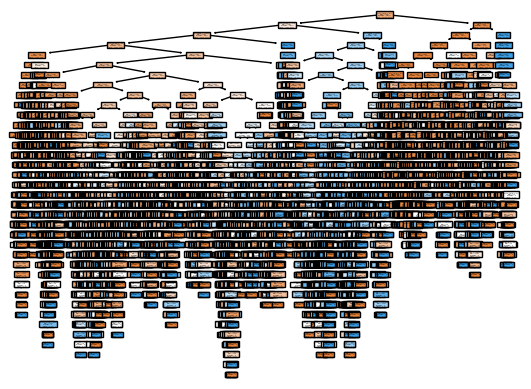

In [ ]:
plot_tree(dtree, filled=True, feature_names=ie.columns)


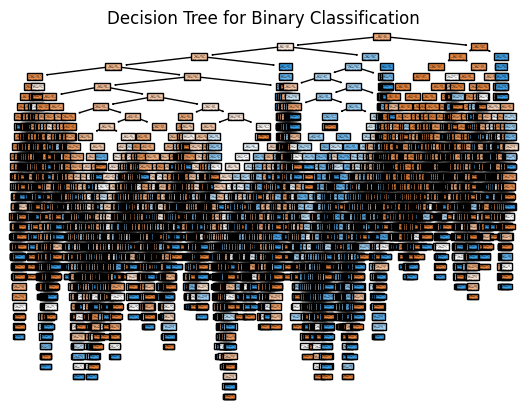

In [ ]:
plot_tree(dtree, filled=True)
plt.title("Decision Tree for Binary Classification")
plt.show()

You can use feature importances to identify and select the most important features for your model, potentially improving model performance and reducing overfitting.It is a common step when working with decision tree models, allowing you to access and work with the importance scores of each feature in the context of your specific machine learning task.

In [ ]:
fi=dtree.feature_importances_

In [ ]:
fi

array([0.13266607, 0.0319468 , 0.21641222, 0.01717046, 0.10873453,
       0.20435193, 0.05373183, 0.01055061, 0.00836794, 0.10699276,
       0.04079205, 0.06828278])

Using the scikit-learn library (sklearn) to perform feature selection with the SelectKBest method, specifically using the chi-squared (chi2) statistical test as the scoring function.The chi-squared test is used for feature selection in classification tasks to determine whether there is a statistically significant association between each feature and the target variable. Features with higher chi-squared scores are considered more relevant to the target variable

In [ ]:

selector = SelectKBest(score_func=chi2, k=5)
X_new = selector.fit_transform(x,y)

In [ ]:
X_new


array([[    39,  77516,   2174,      0,     40],
       [    50,  83311,      0,      0,     13],
       [    38, 215646,      0,      0,     40],
       ...,
       [    58, 151910,      0,      0,     40],
       [    22, 201490,      0,      0,     20],
       [    52, 287927,  15024,      0,     40]])

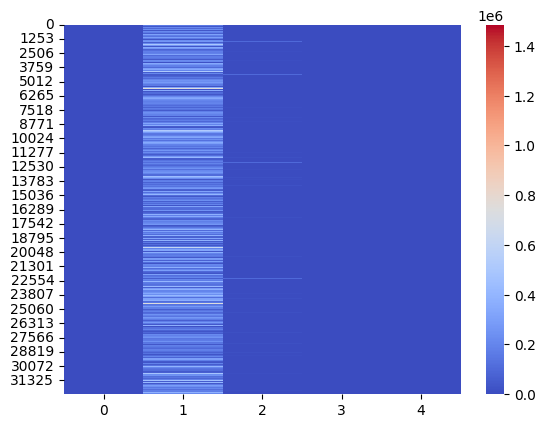

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(X_new, cmap='coolwarm')
plt.show()
